# PCA and SVD

Mathematical Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Set up some data and look at it a little.

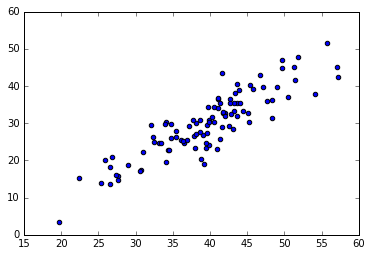

In [60]:
x1 = np.random.normal(loc=40, scale=8, size=100)
x2 = x1 - 10 + np.random.normal(scale=4, size=100)
plt.scatter(x1, x2)

In [61]:
X = np.column_stack((x1, x2))
X.shape

(100, 2)

In [62]:
X.mean(axis=0)

array([ 39.6139664 ,  29.95696949])

In [82]:
X_centered = X - X.mean(axis=0)

In [84]:
np.cov(X, rowvar=0)

array([[ 55.79200879,  57.25359497],
       [ 57.25359497,  75.06442926]])

In [65]:
np.cov(X_centered,rowvar=0)   # illustrating, we really did subtract the mean

array([[ 55.79200879,  57.25359497],
       [ 57.25359497,  75.06442926]])

In [67]:
# an alternate way to calculate the covariance matrix
np.dot(X_centered.T, X_centered)

array([[ 5523.40887003,  5668.10590199],
       [ 5668.10590199,  7431.37849648]])

In [68]:
np.dot(X_centered.T, X_centered)/99 # unimportant scaling

array([[ 55.79200879,  57.25359497],
       [ 57.25359497,  75.06442926]])

### PCA

We have data in $X$.

$C$ is the covariance matrix of $X$.

The eigenvalue decomposition of $C$ is:

$det(C - \lambda*I)=0$

$det\begin{bmatrix}(55.79200879- \lambda), 57.25359497\\57.25359497, (75.06442926-\lambda)\end{bmatrix}=0$

The eigenvalues $\lambda$ represent the amount of variance explained by the dimension represented by their eigenvector $v$.   Principle components are eigenvectors with the largest eigenvalues.

Another look at EigenValue Composition:

$Q \Lambda Q^T = C$

Where the columns of $Q$ are eigenvectors $v$ and the diagonal elements of $\Lambda$ are eigenvalues $\lambda$.

$C v = \lambda v$

The eigenvalues $\lambda$ represent the amount of variance explained by the dimension represented by their eigenvector $v$.

In [103]:
# Compute the eigenvalues and right eigenvectors of a square array.

eig_vals, Q = np.linalg.eig(np.cov(X_centered, rowvar=0)*99)

# what do we notice about our eigenvectors ?
print Q

[[-0.76353557 -0.64576577]
 [ 0.64576577 -0.76353557]]


In [89]:
# just to note:  a special feature of orthonormal matrices
#from scipy import linalg
#inv = linalg.inv(Q)
#print inv

In [91]:
#Q dot (Diagonal of Eigenvalues dot (transpose of v)

# calculating our Covariance matrix (back) : using QΛQT
np.dot(Q, np.dot(np.diag(eig_vals), Q.T))

array([[ 5523.40887003,  5668.10590199],
       [ 5668.10590199,  7431.37849648]])

In [76]:
# sanity check ~ with our original covariance matrix
np.cov(X_centered, rowvar=0)*99

array([[ 5523.40887003,  5668.10590199],
       [ 5668.10590199,  7431.37849648]])

In [146]:
# order eigenvectors by eig_vals
ordered = sorted(zip(eig_vals, Q.T), reverse=True)
eig_vals = np.array([_[0] for _ in ordered])
Q = np.column_stack((_[1] for _ in ordered))

print Q

[[-0.64576577 -0.76353557]
 [-0.76353557  0.64576577]]


In [150]:
# what are we doing here ?
X_transformed = np.dot(Q[:, 0].reshape(2, 1).T, X_centered.T)

In [149]:
X_centered.shape

(100, 2)

In [148]:
Q[0].reshape(2,1).shape

(2, 1)

In [144]:
test=Q[:, 0].reshape(2, 1)
test.shape
X_transformed.shape

(1, 100)

In [109]:
X_transformed[:, :5]

array([[ -0.19732604,  15.38003956,  11.44439777, -22.91265745,   7.9633046 ]])

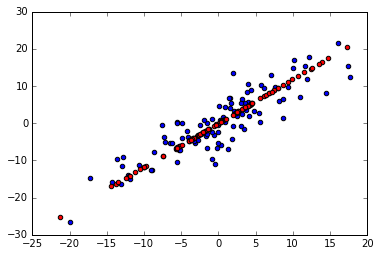

In [151]:
X_reconstituted = np.dot(X_transformed.reshape(100, 1),
                         Q[:, 0].reshape(1, 2))

plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.scatter(X_reconstituted[:, 0], X_reconstituted[:, 1], c='r')

### SVD

We have data in $X$.

The singular value decomposition of $X$ is:

$U \Sigma V^T = X$

Where the columns of $U$ and $V$ are the left and right singular vectors of $X$ and the diagonal elements of $\Sigma$ are the singular values of $X$, also the square roots of the eigenvalues of $X^TX$.

In [114]:
# decompose our matrix (similar to PCA..)
U, singular_vals, V_T = np.linalg.svd(X_centered)
Sigma = np.zeros((100, 2))
Sigma[:2, :2] = np.diag(singular_vals)

In [116]:
# See how well our decomposition did: calculate the matrix back
np.dot(U, np.dot(Sigma, V_T))[:5, :]

array([[ -0.8893717 ,   1.01062985],
       [ -8.87133235, -12.64019274],
       [ -5.49965169, -10.33731925],
       [ 17.44504617,  15.25435642],
       [ -0.84510249,  -9.714762  ]])

In [118]:
X_centered[:5, :]

array([[ -0.8893717 ,   1.01062985],
       [ -8.87133235, -12.64019274],
       [ -5.49965169, -10.33731925],
       [ 17.44504617,  15.25435642],
       [ -0.84510249,  -9.714762  ]])

In [119]:
singular_vals**2

array([ 12225.22036297,    729.56700354])

In [120]:
eig_vals

array([ 12225.22036297,    729.56700354])

In [124]:
# this is the same as our reconstituted matrix that we developed above !
np.dot(U[:,0].reshape(100, 1), Sigma[0, 0]).dot(V_T[0, :].reshape(1, 2))[:5, :]

array([[  0.1274264 ,   0.15066545],
       [ -9.93190312, -11.74320728],
       [ -7.39040036,  -8.73820478],
       [ 14.79620993,  17.49462898],
       [ -5.14242955,  -6.08026632]])

In [126]:
X_reconstituted[:5, :]

array([[  0.1274264 ,   0.15066545],
       [ -9.93190312, -11.74320728],
       [ -7.39040036,  -8.73820478],
       [ 14.79620993,  17.49462898],
       [ -5.14242955,  -6.08026632]])

And there's also value in U and V themselves.